#Project Introduction:

In this project, I set out to analyze mock collections data using Python Pandas and Jupyter Notebook. 
The goal was to gain insights into collections strategies and payment behavior by visualizing key variables. 
By generating synthetic data for account holders, payment statuses, payment amounts, remaining balances, 
last payment dates, and more, I created a dataset that simulates real-world collections scenarios. 
The main objectives were to explore relationships between payment amounts and remaining balances and 
to understand the distribution of debt by payment status. This analysis provides valuable insights 
into customer payment behavior and guides data-driven decision-making in the collections industry.

In [ ]:
# Step 1: Import necessary libraries

# Pandas for working with data
# Numpy for generating random data
# Random for generating random values
# Faker for generating fake account holder names
# Datetime for generating random dates
# Matplotlib is a powerful data visualization library in Python.
# Seaborn is a data visualization library based on Matplotlib.
import pandas as pd
import numpy as np
import random
from faker import Faker
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Step 2: Create a list of account holder names using Faker

# Initialize the Faker library

fake = Faker()

In [32]:
# Generate a list of 100 fake account holder names
account_holders = [fake.name() for _ in range(100)]

In [36]:
# Step 3: Generate random payment data

# Define payment statuses (On Time, Payment Plan, Payment Default)
payment_statuses = ['On Time', 'Payment Plan', 'Payment Default']

In [38]:
# Generate random payment statuses for 100 records
payment_status = [random.choice(payment_statuses) for _ in range(100)]

In [38]:
# Generate random payment amounts between $50 and $1000 for 100 records
payment_amount = [random.uniform(50, 1000) for _ in range(100)]

In [40]:
# Generate random payment amounts between $50 and $5000 for 100 records
payment_amount = [random.uniform(50, 5000) for _ in range(100)]

In [42]:
# Generate random remaining balances between $0 and $5000 for 100 records
remaining_balance = [random.uniform(0, 5000) for _ in range(100)]

In [46]:
# Generate random last payment dates within the last 2 years for 100 records
last_payment_date = [fake.date_between(start_date='-2y', end_date='today') for _ in range(100)]

In [48]:
# Step 4: Generate times defaulted and on-time payments

# Generate random times defaulted between 0 and 5 for 100 records
times_defaulted = [random.randint(0, 5) for _ in range(100)]

In [50]:
# Generate random on-time payments between 1 and 12 for 100 records
on_time_payments = [random.randint(1, 12) for _ in range(100)]

In [52]:
# Step 5: Create a DataFrame

# Create a Pandas DataFrame using the generated data
collections_data = pd.DataFrame({
    'Account Holder': account_holders,
    'Payment Status': payment_status,
    'Payment Amount': payment_amount,
    'Remaining Balance': remaining_balance,
    'Last Payment Date': last_payment_date,
    'Times Defaulted': times_defaulted,
    'On-Time Payments': on_time_payments
})

In [56]:
# Step 6: Display the first few rows of the DataFrame

# Print the first few rows of the DataFrame to inspect the data
print(collections_data.head())

     Account Holder   Payment Status  Payment Amount  Remaining Balance  \
0  Brittany Parsons  Payment Default     2457.192969        3627.077496   
1    Lauren Sanders  Payment Default     4875.123121        3924.516225   
2   Andrew Anderson          On Time      402.432794        3344.715425   
3     Patrick Ortiz     Payment Plan     1742.864932        1277.737720   
4  Vincent Williams  Payment Default     3324.305290          49.617493   

  Last Payment Date  Times Defaulted  On-Time Payments  
0        2022-04-22                0                 1  
1        2023-07-15                4                 3  
2        2023-01-19                5                 8  
3        2021-10-23                4                 9  
4        2023-03-12                0                 1  


Why Create the Scatter Plot:

Visualization of Payment Behavior: The scatter plot of "Payment Amount" vs. "Remaining Balance" offers a visual inspection of two crucial variables in collections data: how much a customer has paid ("Payment Amount") and how much they still owe ("Remaining Balance").

Identification of Patterns or Clusters: Scatter plots have the power to reveal patterns or clusters within data. In this context, we aim to identify clusters of points that suggest specific payment behavior trends among customers.

In [59]:
# Create a scatter plot to visualize Payment Behavior Clusters
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [61]:
# Specify the x and y columns for the plot
x_column = 'Payment Amount'
y_column = 'Remaining Balance'

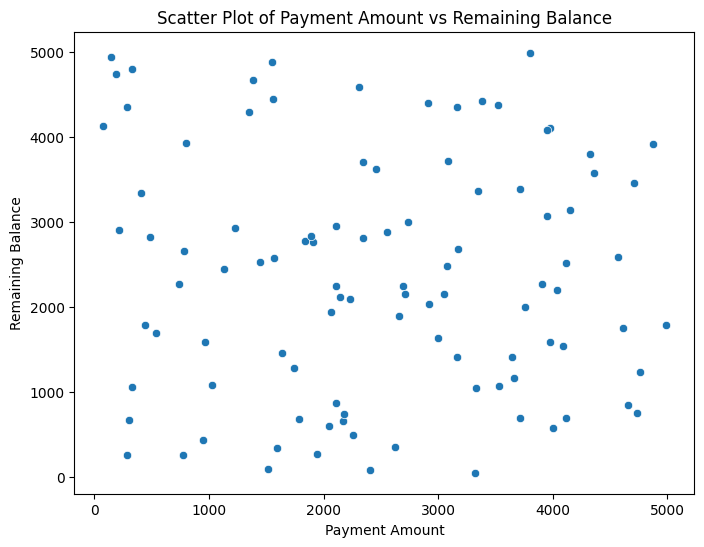

In [ ]:
# Use Seaborn to create the scatter plot
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=collections_data, x=x_column, y=y_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot of Payment Amount vs Remaining Balance')
plt.show()

How to Interpret the Scatter Plot:

Clusters or Patterns: Examine the scatter plot for clusters or patterns of points. Points that are close together may indicate groups of customers with similar payment behaviors.

Quadrants: Pay attention to the quadrant(s) where points fall. For instance, points in the upper-left quadrant may represent customers with significant payments and low remaining balances, signifying good payment behavior. Conversely, points in the lower-right quadrant may represent customers with low payments and high remaining balances, indicating payment issues.

Outliers: Identify any outliers—data points that deviate significantly from the majority of points. Outliers may represent unique cases or anomalies that require further investigation.

Trends: Analyze the overall trend. Are most points concentrated in a particular area of the plot, or is the data evenly distributed? Understanding the distribution provides insights into the payment behavior of your customer base.

#Introduction to Debt Distribution by Payment Status:

In this analysis, we delve into the distribution of outstanding debt within our collections dataset, categorizing it based on different payment statuses. The pie chart presented below offers a visual snapshot of how debt is distributed among various payment status categories. This breakdown is instrumental in understanding the financial landscape of our collections portfolio and guides us in formulating targeted strategies to manage and recover outstanding balances effectively.

Let's explore the pie chart to gain insights into the proportions of debt associated with each payment status category, highlighting areas that demand special attention and intervention in our collections efforts.

In [73]:
# Group data by 'Payment Status' and calculate the total debt for each category
debt_distribution = collections_data.groupby('Payment Status')['Remaining Balance'].sum().reset_index()

In [75]:
# Labels for the types of debt
labels = debt_distribution['Payment Status']


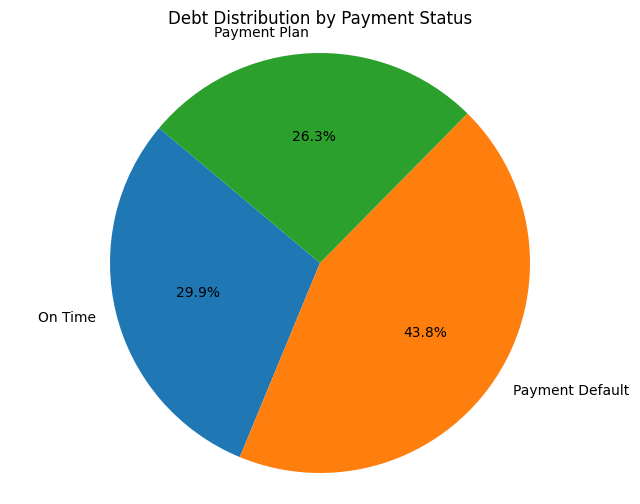

In [77]:
# Create a pie chart with labels
plt.figure(figsize=(8, 6))
plt.pie(debt_distribution['Remaining Balance'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Debt Distribution by Payment Status')
plt.show()

#Distribution of Debt by Payment Status:

The pie chart illustrates the distribution of debt across different payment statuses based on the updated data analysis. It provides a visual representation of the outstanding balances associated with each payment status category.

Key Observations:

Payment Plan (26.3%): This category represents accounts that are currently under a structured payment plan (PPA). These accounts collectively account for 26.3% of the total debt. It indicates that a portion of accounts is actively working to repay their dues in installments.

On Time (29.9%): Accounts categorized as "On Time" (OT) constitute 29.9% of the total debt. These accounts are making timely payments as scheduled, which is an encouraging sign for collections efforts.

Payment Default (43.8%): The largest category in the pie chart is "Payment Default" (PD), representing 43.8% of the total debt. These accounts have defaulted on their payment plans, indicating a critical area of concern for collections.

Implications and Strategies:

Payment Plan (PPA): Accounts in this category are actively engaged in repayment. Collections strategies may involve monitoring and supporting these accounts to ensure they continue to meet their payment obligations as per the plan.

On Time (OT): These accounts are demonstrating good payment behavior by making payments on time. Collections efforts for this category may involve maintaining open communication and ensuring continued compliance.

Payment Default (PD): The significant portion of debt in the "Payment Default" category highlights a critical need for collections efforts. Strategies may include outreach to negotiate payment arrangements, addressing the reasons for defaults, and implementing targeted interventions to recover the outstanding balances.

Revised Collections Strategies:

With the updated data showing a substantial percentage of debt in the "Payment Default" category, it underscores the importance of focusing efforts on addressing defaulting accounts. While actively managing accounts in payment plans and ensuring on-time payments remain important, prioritizing the resolution of defaults can significantly impact debt recovery and collections success.

In summary, the pie chart provides a clear overview of the distribution of debt by payment status, allowing collections professionals to prioritize their efforts effectively and implement tailored strategies for different account categories.